# Setting up enviroments requirements
If you want to run this Jupyter Notebook on Google colab, click on the next hyperlink: [Load on Google Colab.](https://githubtocolab.com/mjacker/MJCapstone/blob/develop/0_merged_ipynb_files_for_google_colab.ipynb)

If you want to load the Jypyter Notebook locally then clone the github repository on [Github Repository](https://github.com/mjacker/MJCapstone/tree/develop) by yourself and prepare a venv python enviroment to install the requirements dependencies.

Uncomment the next block to install dependencies.


## Venv python enviroment 

In [8]:
!python -m pip install -r requirement.yml

  Using cached asttokens-2.4.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached comm-0.1.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached executing-2.0.0-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached fastjsonschema-2.18.1-py3-none-any.whl.metadata (2.0 kB)
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- -------------------------------- 30.7/155.5 kB ? eta -:--:--
     ------------------------------ ------- 122.9/155.5 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 155.5/155.5 kB 1.9 MB/s eta 0:00:00
  Using cached import_ipynb-0.1.4-py3-none-any.whl (4.1 kB)
  Using cached ipython-8.16.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jsonschema-4.19.1-py3-none-any.whl.metada

Reason for being yanked: Released 2.0.1 which is equivalent but added 'python_requires = >=3.5' so that pip install with Python 2 uses the previous version 1.2.0.
Reason for being yanked: Bug in kernel env update


## Downloading the Dataset
Downloading on Google colab. (By default)

In [ ]:
# on linux
!apt-get install awscli
!python -m pip install requests==2.28.2
!mkdir datasets
!aws s3 ls --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/" --recursive --human-readable
!aws s3 cp --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv" "./datasets/"
!aws s3 cp --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv" "./datasets/"


Downloading on windows.
- Requirement, need to install aswcli on windows.

In [ ]:
# on w10
# not working yet

# !pip install awscli
# !pip install boto2

---
# 2. Dataset Preparation
For this Capstone, are selecte to be procesed two datasets from #[CSE-CIC-IDS2018](https://www.unb.ca/cic/datasets/ids-2018.html)
- Friday 02 03 2018
- Friday 16 02 2018


In [9]:
%%time
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: total: 2.06 s
Wall time: 7.42 s


### Loading path to dataset files.

In [10]:
DATASET_FILES_PATH = []
for path, _, file in (os.walk("./datasets/")):
    for eachFile in file:
        DATASET_FILES_PATH.append(path + eachFile)
DATASET_FILES_PATH

['./datasets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 './datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv']

### Loading datasets to PandaData Frame

In [11]:
%%time
df_friday1 = pd.read_csv(DATASET_FILES_PATH[0])
df_friday2 = pd.read_csv(DATASET_FILES_PATH[1])


<timed exec>:2: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 20.5 s
Wall time: 24.4 s


### Concatenating datasets

In [12]:
df_dataset = pd.concat([df_friday1, df_friday2], axis=0, ignore_index=True)

Because two datasets was concatenated, then need to delete the row which cointain the second dataframe title


In [13]:
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)
print(df_dataset.shape)

(2097149, 80)


In [14]:
df_dataset.sample()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
569693,3389,6,02/03/2018 05:10:41,2369989,9,9,1278,1640.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Drop unrelated columns
Since Port, protocol and the timestand are not related to the label with those selectec machine learning, those will be droped

In [15]:
df_dataset.drop(columns=['Dst Port', 'Protocol', 'Timestamp'], inplace=True)


In [16]:
df_dataset.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,281,2,1,38,0.0,38,0,19.0,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,132,2,0,0,0.0,0,0,0.0,0.0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Droping rows with infinite or null values

In [17]:
print("Shape before deleting rows: ", df_dataset.shape)
df_dataset[df_dataset.isnull().any(axis=1)]
df_dataset.replace([np.inf, -np.inf], np.nan)
df_dataset.dropna(inplace=True)
print("Shape after deteling rows:", df_dataset.shape)

Shape before deleting rows:  (2097149, 77)
Shape after deteling rows: (2094591, 77)


### Check Label labels

In [18]:
print(df_dataset['Label'].unique())
print(df_dataset.shape)

['Benign' 'Bot' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk']
(2094591, 77)


### Changing Labels names 
To unify the labels, those malicius packages will be renamend as ones, and the normal as zeros.
- 0 - normal package
- 1 - malicius package

In [19]:
%%time
df_dataset.replace(to_replace=['Benign'], value=0, inplace=True)
df_dataset.replace(to_replace=["Bot", "DoS attacks-SlowHTTPTest", "DoS attacks-Hulk"], value=1, inplace=True)
df_dataset[df_dataset.columns[-1]].unique()

CPU times: total: 2min 26s
Wall time: 2min 30s


array([0, 1], dtype=int64)

### convert some string numbers to numbers

In [20]:
df_dataset.astype('float')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097146,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097147,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097148,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Dropping duplicated rows

In [21]:
print(df_dataset.shape)
df_dataset.drop_duplicates(inplace=True)
print(df_dataset.shape)


(2094591, 77)
(1364018, 77)


### Check columns datatypes

In [22]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364018 entries, 0 to 2056064
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Flow Duration      1364018 non-null  object
 1   Tot Fwd Pkts       1364018 non-null  object
 2   Tot Bwd Pkts       1364018 non-null  object
 3   TotLen Fwd Pkts    1364018 non-null  object
 4   TotLen Bwd Pkts    1364018 non-null  object
 5   Fwd Pkt Len Max    1364018 non-null  object
 6   Fwd Pkt Len Min    1364018 non-null  object
 7   Fwd Pkt Len Mean   1364018 non-null  object
 8   Fwd Pkt Len Std    1364018 non-null  object
 9   Bwd Pkt Len Max    1364018 non-null  object
 10  Bwd Pkt Len Min    1364018 non-null  object
 11  Bwd Pkt Len Mean   1364018 non-null  object
 12  Bwd Pkt Len Std    1364018 non-null  object
 13  Flow Byts/s        1364018 non-null  object
 14  Flow Pkts/s        1364018 non-null  object
 15  Flow IAT Mean      1364018 non-null  object
 16  Flow 

### Distributions labels after drop rows

1073929
290089
(1364018, 77)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20848\2206611950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dataset[df_dataset.columns[-1]],


<Axes: xlabel='Label', ylabel='count'>

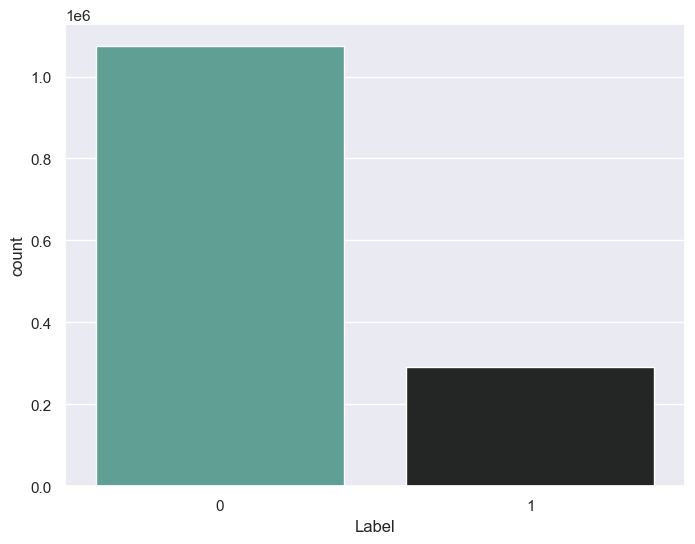

In [23]:
print(df_dataset["Label"].value_counts()[[0]].sum())
print(df_dataset["Label"].value_counts()[[1]].sum())

print(df_dataset.shape)

sns.set(rc={'figure.figsize':(8, 6)}
        )
sns.countplot(x=df_dataset[df_dataset.columns[-1]], 
              data = df_dataset,
              palette = 'dark:#5A9_r')

### Saving the Dataset as a csv file

In [24]:
df_dataset.to_csv("processed_dataset.csv", index=False)